In [1]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%matplotlib inline
import matplotlib_inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", None)
pd.set_option('display.precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

In [14]:
def ohe(df, list_of_columns):
    # Inizializzare OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    # Manteniamo una copia del DataFrame originale
    df_encoded = df.copy()

    # Iterare sulle colonne da codificare
    for col in list_of_columns:
        # Applicare OneHotEncoder alla colonna specifica
        encoded = encoder.fit_transform(df[[col]])

        # Creare un DataFrame con le nuove colonne codificate, usando gli stessi indici del DataFrame originale
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([col]), index=df.index)

        # Concatenare le nuove colonne codificate al DataFrame originale
        df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
    df_encoded = df_encoded.drop(list_of_columns, axis=1)

    # Restituire il DataFrame finale, mantenendo le colonne originali
    return df_encoded

In [15]:
def train_and_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuratezza: {accuracy}')

    # Calcolare la precisione
    precision = precision_score(y_test, y_pred)
    print(f'Precisione: {precision}')

    # Calcolare il recall (sensibilità)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Calcolare FPR (False Positive Ration)
    print(f'FPR: {1 - recall}')

    # Matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matrice di confusione:\n{cm}')

    return model

In [16]:
def test(model, X_test, y_test):

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuratezza: {accuracy}')

    # Calcolare la precisione
    precision = precision_score(y_test, y_pred)
    print(f'Precisione: {precision}')

    # Calcolare il recall (sensibilità)
    recall = recall_score(y_test, y_pred)
    print(f'Recall: {recall}')

    # Calcolare FPR (False Positive Ration)
    print(f'FPR: {1 - recall}')

    # Matrice di confusione
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matrice di confusione:\n{cm}')
    return 0

# Test migliore

In [ ]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 80-20
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, test_size=0.20)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

# Step creazione modello

In [32]:
df = pd.read_csv("Base.csv")

df.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.99,-1,25,40,6.74e-03,102.45,AA,1059,13096.04,7850.96,6742.08,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.22,linux,1,1,0,0
1,0,0.8,0.62,-1,89,20,1.01e-02,-0.85,AD,1658,9223.28,5745.25,5941.66,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.36,other,1,1,0,0
2,0,0.8,1.00,9,14,40,1.23e-02,-1.49,AB,1095,4471.47,5471.99,5992.56,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.73,windows,0,1,0,0
3,0,0.6,0.48,11,14,30,6.99e-03,-1.86,AB,3483,14431.99,6755.34,5970.34,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.22,linux,1,1,0,0
4,0,0.9,0.84,-1,29,40,5.74e+00,47.15,AA,2339,7601.51,5124.05,5940.73,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.74,other,0,1,0,0
5,0,0.6,0.29,-1,369,30,2.42e-02,-1.23,AD,1204,11556.96,7506.95,6482.92,705,5,CB,134,1,BE,1,1,30,0,200.0,0,INTERNET,6.99,linux,1,1,0,0
6,0,0.2,0.77,22,4,40,6.92e-03,-0.54,AB,1998,11723.99,7864.28,6338.80,28,8,CA,72,1,BC,1,1,1,0,200.0,0,INTERNET,28.20,x11,1,1,0,0
7,0,0.8,0.15,-1,103,40,4.51e-02,-1.10,AB,1548,4999.56,4526.86,6426.79,6,7,CA,163,0,BE,1,1,25,1,200.0,0,INTERNET,11.23,other,1,1,0,0
8,0,0.3,0.52,21,2,30,3.52e-02,-0.96,AB,1781,6979.99,4335.69,6624.96,2,10,CA,35,0,BC,1,0,2,0,200.0,0,INTERNET,5.33,other,1,1,0,0
9,0,0.8,0.83,-1,134,20,1.72e-02,-1.36,AD,3113,7549.99,6273.92,6313.00,14,20,CA,201,1,BD,1,1,15,0,1500.0,0,INTERNET,4.10,other,1,1,0,0


In [ ]:
df.isnull().sum()

In [ ]:
print(df[(df['fraud_bool'] == 0)].shape[0])
print(df[(df['fraud_bool'] == 1)].shape[0])

### Feature numeriche

In [10]:
numeric_features = [x for x in df.columns if df[x].nunique() >= 10]

print(numeric_features)

['name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'days_since_request', 'intended_balcon_amount', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit']


### Feature non numeriche

In [33]:
categorical_features = [x for x in df.columns if df[x].dtypes == "O"]

print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


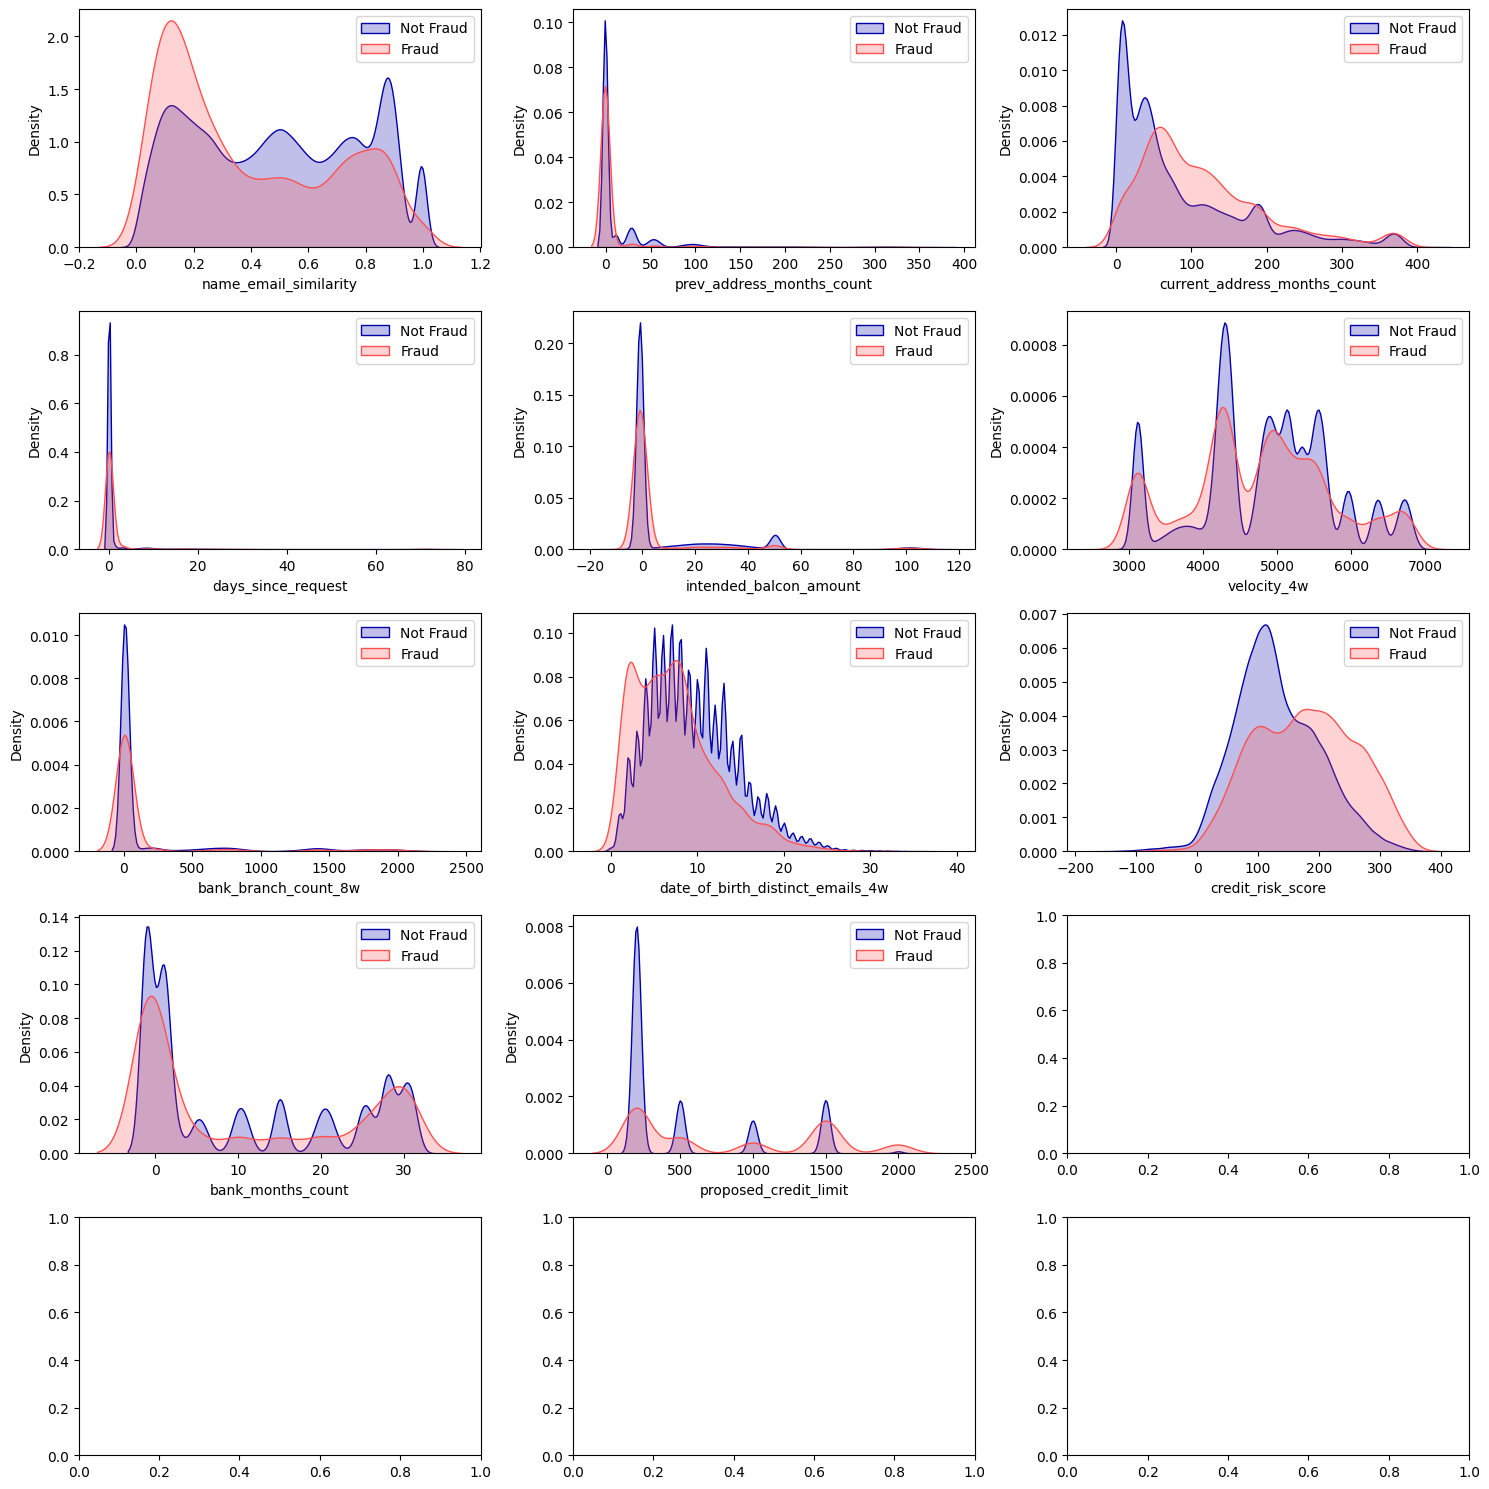

In [11]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Loop through the numeric features and plot a kernel density plot for each feature
# 
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### OneHotEncoder sulle feature non numeriche

In [34]:
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Individuazione numero componenti principali da utilizzare

[0.064 0.049 0.048 0.042 0.041 0.037 0.034 0.03  0.028 0.028 0.024 0.023
 0.023 0.022 0.022 0.021 0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02
 0.019 0.019 0.019 0.018 0.018 0.018 0.018 0.017 0.017 0.017 0.016 0.015
 0.014 0.013 0.013 0.011 0.011 0.01  0.009 0.007 0.006 0.003 0.    0.
 0.    0.    0.    0.   ]


Text(0, 0.5, 'cumulative explained variance')

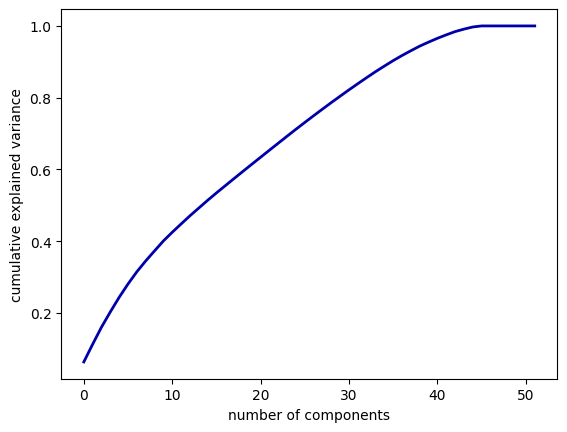

In [31]:
df = pd.read_csv("Base.csv")

df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

X = df.drop(['fraud_bool'], axis=1)
y = df['fraud_bool']



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


explained_variance = pca.explained_variance_ratio_
print(explained_variance)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## Test senza eliminazione troppe non frodi, solo con ohe

In [39]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Creazione dataset feature e target
features = df.drop(['fraud_bool'], axis=1)
targets = df['fraud_bool']

# Split train e test 75-25
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)


classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.989048
Precisione: 0.5
Recall: 0.002191380569758948
FPR: 0.997808619430241
Matrice di confusione:
[[247256      6]
 [  2732      6]]


## Test senza normalizzazione e pca

In [38]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 75-25
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)


classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.986050858569655
Precisione: 1.0
Recall: 0.6366279069767442
FPR: 0.3633720930232558
Matrice di confusione:
[[68937     0]
 [ 1000  1752]]


## Test con StandardScaler

In [21]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 75-25
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)

# Scaling dei dataset contenenti le feature di train e test
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9806106934118205
Precisione: 0.9348659003831418
Recall: 0.5319767441860465
FPR: 0.46802325581395354
Matrice di confusione:
[[68835   102]
 [ 1288  1464]]


## Test con eliminazione feature numeriche meno significative

In [17]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 75-25
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9858555705896302
Precisione: 0.986562150055991
Recall: 0.6402616279069767
FPR: 0.3597383720930233
Matrice di confusione:
[[68913    24]
 [  990  1762]]


## Test con 10 component

In [ ]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 75-25
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9848651815480757
Precisione: 0.9690489589195272
Recall: 0.6257267441860465
FPR: 0.37427325581395354
Matrice di confusione:
[[68882    55]
 [ 1030  1722]]


## Test con 5 component

In [ ]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 75-25
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9602309977820865
Precisione: 0.15384615384615385
Recall: 0.007994186046511628
FPR: 0.9920058139534884
Matrice di confusione:
[[68816   121]
 [ 2730    22]]


## Test con 35 component

In [32]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 75-25
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=35)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9854091980638592
Precisione: 0.9868721461187214
Recall: 0.6282703488372093
FPR: 0.37172965116279066
Matrice di confusione:
[[68914    23]
 [ 1023  1729]]


In [36]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 80-20
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, test_size=0.20)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9860333734372548
Precisione: 0.9874389392882066
Recall: 0.6437670609645132
FPR: 0.3562329390354868
Matrice di confusione:
[[55135    18]
 [  783  1415]]


In [37]:
df_var1 = pd.read_csv("Variant I.csv")

df_var1 = ohe(df_var1,['employment_status','payment_type','housing_status', 'source', 'device_os'])

df_var1 = df_var1.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

X = df_var1.drop(['fraud_bool'], axis=1)
y = df_var1['fraud_bool']


X_test = sc.transform(X)

X_test = pca.transform(X_test)

test(model, X_test , y)

Accuratezza: 0.463485
Precisione: 0.014180213895833025
Recall: 0.695348626348717
FPR: 0.30465137365128303
Matrice di confusione:
[[455816 533155]
 [  3360   7669]]


0

## Test con 20-80 divisione test train

In [18]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 80-20
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, test_size=0.20)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9860159369496608
Precisione: 0.9853963838664812
Recall: 0.6446769790718835
FPR: 0.3553230209281165
Matrice di confusione:
[[55132    21]
 [  781  1417]]


In [40]:
df = pd.read_csv("Base.csv")

# OneHotEncoder sulle feature non numeriche
df = ohe(df,['employment_status','payment_type','housing_status', 'source', 'device_os'])

# Eliminazione feature numeriche meno significative
df = df.drop(['session_length_in_minutes', 'zip_count_4w', 'velocity_6h', 'velocity_24h'], axis=1)

# Eliminazione non frodi per rendere il rapporto frodi-non frodi 1 a 25
df_frodi = df[(df['fraud_bool'] == 1)]
n = df[(df['fraud_bool'] == 1)].shape[0]
df_not_frodi = df[(df['fraud_bool'] != 1)].head(n*25)

df_rapp = pd.concat([df_frodi, df_not_frodi])

# Creazione dataset feature e target
features = df_rapp.drop(['fraud_bool'], axis=1)
targets = df_rapp['fraud_bool']

# Split train e test 80-20
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0, test_size=0.30)

# Scaling dei dataset contenenti le feature di train e test
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis
pca = PCA(n_components=16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier()
model = train_and_test(classifier, X_train, y_train, X_test, y_test)

Accuratezza: 0.9858649028793286
Precisione: 0.9857076994006455
Recall: 0.6433945230213662
FPR: 0.35660547697863376
Matrice di confusione:
[[82673    31]
 [ 1185  2138]]
